`monitoring` regression example (boston dataset)
-----

### Load packages

In [1]:
from transparentai import monitoring
from transparentai.datasets import load_boston

from datetime import datetime, timedelta
import random 
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Load & prepare data

In [2]:
data = load_boston()
X, Y = data.drop(columns='MEDV'), data['MEDV']

Split train test

In [3]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.33, random_state=42)

### Train classifier

In [4]:
regr = LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Create fake timestamp prediction data

In [5]:
timestamp = [datetime.today() - timedelta(days=random.randint(0, 300)) for i in range(len(Y))]
timestamp = pd.Series(timestamp, name='timestamp')

Prepare param

In [6]:
y_true = Y
y_pred = regr.predict(X)

### Use `monitoring.monitor_model` 

In [7]:
monitoring.monitor_model(y_true, y_pred, timestamp, interval='month', classification=False)

,MAE,mean_squared_error,root_mean_squared_error,r2,count
2019-07,2.241863,9.293254,3.048484,0.853452,33
2019-08,2.872383,12.212083,3.494579,0.757947,51
2019-09,3.862611,29.791149,5.458127,0.675688,57
2019-10,3.923583,46.043047,6.785503,0.496325,52
2019-11,3.196932,17.205043,4.147896,0.759729,52
2019-12,3.534064,22.821062,4.777139,0.789752,49
2020-01,3.367005,19.592604,4.426353,0.752104,45
2020-02,2.688687,12.537520,3.540836,0.847629,55
2020-03,3.846465,26.046832,5.103610,0.788840,47
2020-04,3.411965,25.294054,5.029319,0.669984,50


In [8]:
monitoring.monitor_model(y_true, y_pred, timestamp, interval='year', classification=False)

,MAE,mean_squared_error,root_mean_squared_error,r2,count
2019,3.347203,23.927625,4.891587,0.709234,294
2020,3.237203,19.896748,4.460577,0.772026,212


### Use `monitoring.plot_monitoring`

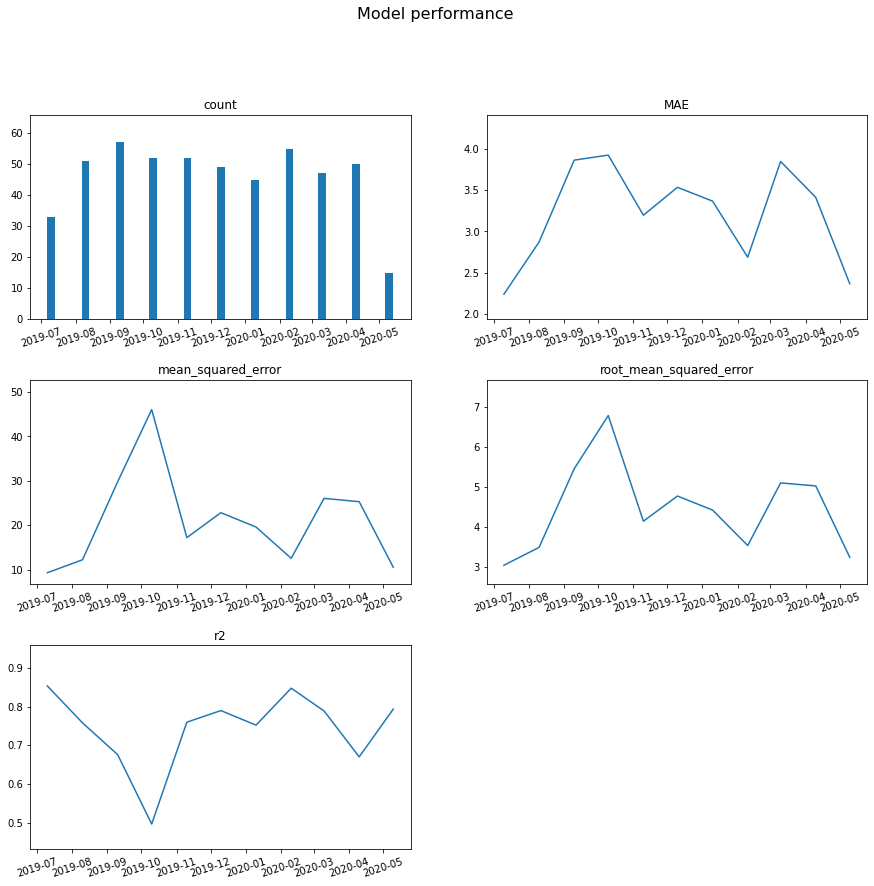

In [9]:
monitoring.plot_monitoring(y_true, y_pred, timestamp, interval='month', classification=False)

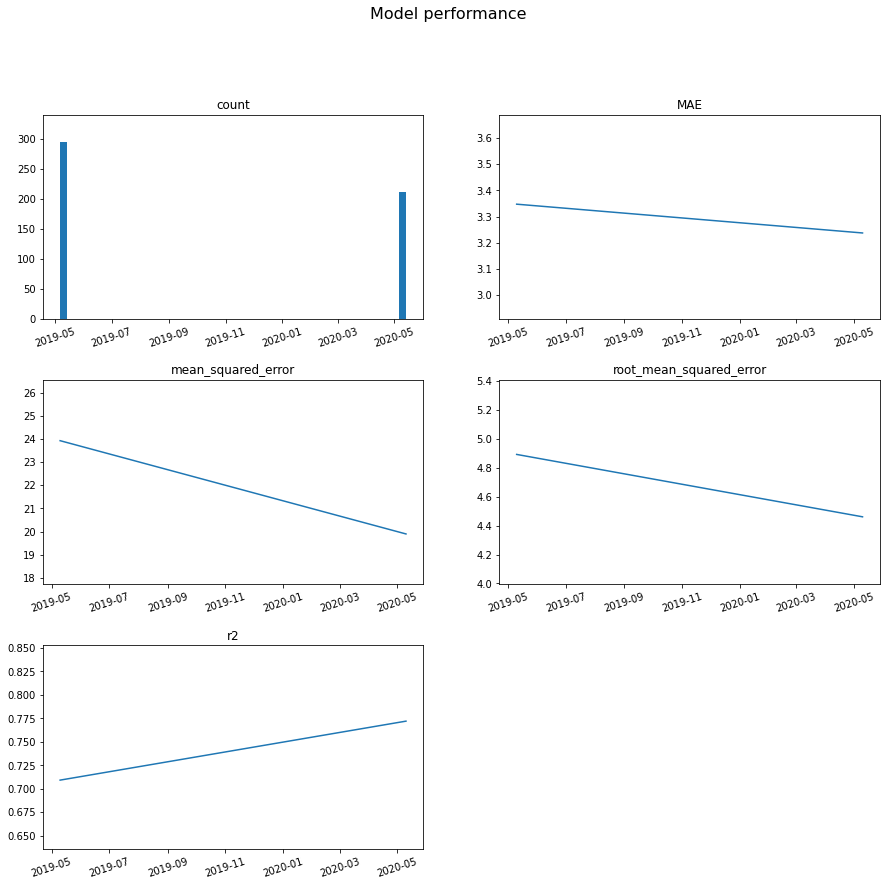

In [10]:
monitoring.plot_monitoring(y_true, y_pred, timestamp, interval='year', classification=False)